In [136]:
from dptb.nn.dftbsk import DFTBSK
from ase.io import read
from dptb.nn.nnsk import NNSK
from dptb.data import AtomicData, AtomicDataDict
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import torch
from dptb.postprocess.bandstructure.band import Band

import matplotlib.pyplot as plt 
import numpy as np

In [64]:
#sk_path = './slakos/skparams.pth'
#sk_path = "/Users/aisiqg/Desktop/work/github/dftb_skfiles/ParameterSets/PRIOR/complete_set"
#basis = {'Mo':['5s','5p',"4d"],"S":["3s","3p","d*"]}
#model = DFTBSK(basis=basis, skdata=sk_path,overlap=True)

In [147]:
#model = build_model('./mos2_dftb.json')
model = build_model('./nnsk_nos/checkpoint/nnsk.ep500.pth')

#model.ovp_factor = torch.tensor(0.0)

In [148]:
task_options={
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 30],
            [0.5, 0, 0, 30],
            [0.3333333, 0.3333333, 0, 30],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"Mo":6,"S":6},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "./data/kpath.0/eigenvalues.npy"
    }
kpath_kwargs = task_options

stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.3,"er_max": 3.5, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
#bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
#               E_fermi = -5,
#               emin = -22,
#               emax = 10)

(0.0, 0.49538858145220366)

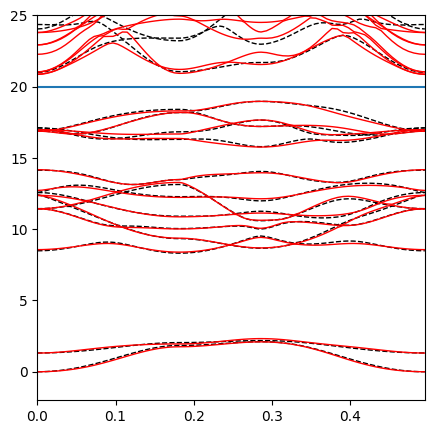

In [149]:
ref_band = np.loadtxt('./data/BANDS_1.dat')
plt.figure(figsize=(5,5),dpi=100)
xx = eigenstatus["xlist"]
#plt.plot(eigenstatus['xlist'], eigenstatus['eigenvalues'] - eigenstatus['E_fermi'], 'r-',lw=1)
plt.plot(ref_band[:,1], ref_band[:,2+4:] - np.min(ref_band[:,2+4:]),'k--',lw=1)
plt.plot(eigenstatus['xlist'], eigenstatus['eigenvalues'][:,0:]- np.min(eigenstatus['eigenvalues']), 'r-',lw=1)
#plt.plot(band['xcoords'],band['eigenvalues']-np.min(band['eigenvalues']),'k--',ms=2)
plt.axhline(20)
plt.ylim(-2,25)
plt.xlim(xx.min(), xx.max())

In [86]:
common_options= {
            "basis": {
                "Mo":["5s","5p","4d"],
                "S":["3s","3p","d*"]
            },
            "device": "cpu",
            "dtype": "float32",
            "overlap": True,
            "seed": 42
    }

model_options={
        "dftbsk": {
            "skdata":"../../../dftb_skfiles/ParameterSets/PRIOR/complete_set"
        },
        "embedding":{
            "method": "se2",
            "rs": 2.5,
            "rc": 5.0,
            "radial_net": {
                "neurons": [40,20,10]
            }
        },
        "prediction":{
            "method": "sktb",
            "neurons": [50,50,50]
        }
    }

In [3]:
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band


model = build_model(checkpoint="./dftbenv2/checkpoint/mix.latest.pth")
#model2 = model.dftbsk
#model2.transform = True
task_options={
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 30],
            [0.5, 0, 0, 30],
            [0.3333333, 0.3333333, 0, 30],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"Mo":6,"S":6},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "./data/kpath.0/eigenvalues.npy"
    }
kpath_kwargs = task_options

stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
#bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
#               E_fermi = -5,
#               emin = -22,
#               emax = 10)


(0.0, 0.49538858145220366)

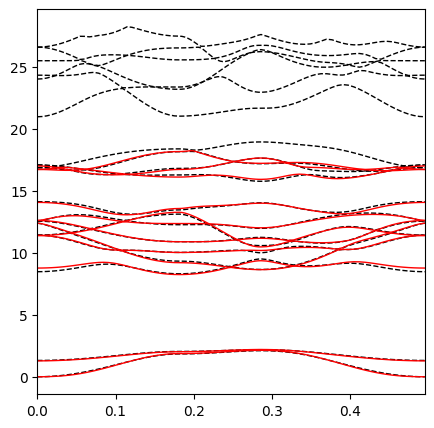

In [9]:
import matplotlib.pyplot as plt 
import numpy as np
ref_band = np.loadtxt('./data/BANDS_1.dat')
plt.figure(figsize=(5,5),dpi=100)
xx = eigenstatus["xlist"]
#plt.plot(eigenstatus['xlist'], eigenstatus['eigenvalues'] - eigenstatus['E_fermi'], 'r-',lw=1)
plt.plot(ref_band[:,1], ref_band[:,2+4:] - np.min(ref_band[:,2+4:]),'k--',lw=1)
plt.plot(eigenstatus['xlist'], eigenstatus['eigenvalues'][:,0:9+3]- np.min(eigenstatus['eigenvalues']), 'r-',lw=1)
#plt.plot(band['xcoords'],band['eigenvalues']-np.min(band['eigenvalues']),'k--',ms=2)
#plt.ylim(-2,20)
plt.xlim(xx.min(), xx.max())

In [124]:
icc=0
ped = 10
for  i in range(100):
    if icc//ped > 0:
        print(i)
        icc = 0
    else:
        icc +=1

10
21
32
43
54
65
76
87
98


In [128]:
icc = 0
ped = 10
for i in range(100):
    icc += 1  # 每轮循环增加icc的值
    if icc % ped == 0:  # 当icc是ped的倍数时
        print(i)  # 打印当前i的前一个数

9
19
29
39
49
59
69
79
89
99
